In [1]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec

from utils import *
from utilsPCA import *
from plotting import *
from efficiency import *

import matplotlib as mpl

mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('legend', fontsize=16) 
mpl.rc('axes', labelsize=16, titlesize=20)

#plt.style.use(hep.style.CMS)
%matplotlib inline

In [2]:
C = 29.9792458 #cm/ns

In [3]:
#filename = 'root_files/histo_SinglePi_3LC.root'
name = 'histo_singlePi_simhit_rechit'
filename = 'root_files/'+name+'.root'
file = uproot.open(filename)

In [4]:
file.keys()

['ticlDumper;1',
 'ticlDumper/rechits;11',
 'ticlDumper/rechits;10',
 'ticlDumper/simhits;5',
 'ticlDumper/simhits;4',
 'ticlDumper/clusters;2',
 'ticlDumper/clusters;1',
 'ticlDumper/tracksters;1',
 'ticlDumper/candidates;1',
 'ticlDumper/trackstersMerged;1',
 'ticlDumper/associations;1',
 'ticlDumper/simtrackstersSC;1',
 'ticlDumper/simtrackstersCP;1',
 'ticlDumper/simTICLCandidate;1',
 'ticlDumper/tracks;1']

In [5]:
simtrackstersSC = file["ticlDumper/simtrackstersSC"]
simtrackstersCP = file["ticlDumper/simtrackstersCP"]
tracksters  = file["ticlDumper/tracksters"]
trackstersMerged = file["ticlDumper/trackstersMerged"]
associations = file["ticlDumper/associations"]
tracks = file["ticlDumper/tracks"]
simTICLCandidate = file["ticlDumper/simTICLCandidate"]
TICLCandidate = file["ticlDumper/candidates"]
clusters = file["ticlDumper/clusters"]
simhits = file["ticlDumper/simhits"]
rechits = file["ticlDumper/rechits"]

In [10]:
simtrackstersCP.keys()

['event',
 'NTracksters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'barycenter_eta',
 'barycenter_phi',
 'pdgID',
 'trackIdx',
 'trackTime',
 'boundaryX',
 'boundaryY',
 'boundaryZ',
 'boundaryEta',
 'boundaryPhi',
 'boundaryPx',
 'boundaryPy',
 'boundaryPz',
 'track_boundaryX',
 'track_boundaryY',
 'track_boundaryZ',
 'track_boundaryEta',
 'track_boundaryPhi',
 'track_boundaryPx',
 'track_boundaryPy',
 'track_boundaryPz',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity']

In [7]:
HGCsimhits = simhits.arrays(['ID', 'energy', 'position_x', 'position_y', 'position_z', 'time'])
HGCrechits = rechits.arrays(['ID', 'energy', 'position_x', 'position_y', 'position_z', 'time', 'time_error'])

In [11]:
HGCsimhits[0].time

<Array [11.1, 11.1, 11.1, ... 371, 71, 84.2] type='703 * float32'>

## simhits distribution

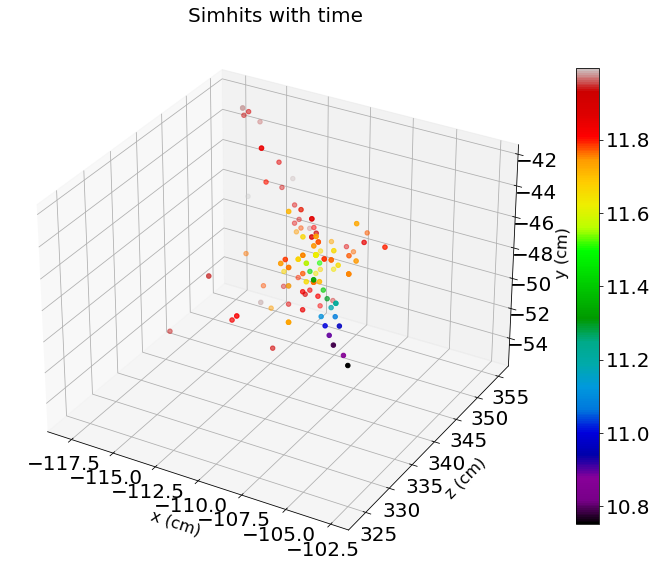

In [40]:
eid = 0
this_ev_simhits = HGCsimhits[eid][HGCsimhits[eid]["position_z"]>0]
this_ev_simhits = this_ev_simhits[this_ev_simhits.time < 12]

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')
#ax1.view_init(10, -45)

ax1.set_xlabel("\nx (cm)")
ax1.set_zlabel("\ny (cm)")
ax1.set_ylabel("\nz (cm)")

ax1.set_xlim(ak.min(this_ev_simhits.position_x), ak.max(this_ev_simhits.position_x))
ax1.set_zlim(ak.min(this_ev_simhits.position_y), ak.max(this_ev_simhits.position_y))
ax1.set_ylim(ak.min(this_ev_simhits.position_z), ak.max(this_ev_simhits.position_z))

norm = mpl.colors.Normalize(vmin=min(this_ev_simhits.time), vmax=max(this_ev_simhits.time))
scamap = plt.cm.ScalarMappable(norm=norm, cmap='nipy_spectral')
ax1.scatter(this_ev_simhits.position_x, this_ev_simhits.position_z, this_ev_simhits.position_y, c= this_ev_simhits.time, cmap="nipy_spectral")
fig.colorbar(scamap, shrink=0.7)

ax1.set_title(f"Simhits with time")
plt.show()

In [41]:
def distance(a,b):
    return np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2+(a[2]-b[2])**2)

In [46]:
this_ev_simhits = this_ev_simhits[this_ev_simhits.time < 11]
for sh in range(len(this_ev_simhits.position_x)-1):
    my_hit = [this_ev_simhits.position_x[sh], this_ev_simhits.position_y[sh], this_ev_simhits.position_z[sh], this_ev_simhits.time[sh]]
    next_hit = [this_ev_simhits.position_x[sh+1], this_ev_simhits.position_y[sh+1], this_ev_simhits.position_z[sh+1], this_ev_simhits.time[sh+1]]
    print(distance(my_hit[:3], next_hit[:3]), my_hit[3]-next_hit[3], distance(my_hit[:3], next_hit[:3])/abs(my_hit[3]-next_hit[3]))
# print(this_ev_simhits.position_x, this_ev_simhits.position_z, this_ev_simhits.position_y, this_ev_simhits.time)

1.5646895050419443 -0.035164833068847656 44.49586045179024
2.390874082774954 -0.07300281524658203 32.750436742737726
1.5646829292565319 -0.035180091857910156 44.476374182767145
2.063018798828125 -0.0730447769165039 28.243207603828026


### delta between track time and trackster time

In [42]:
track_beta = tracks["track_beta"].array()
track_time_mtd = tracks["track_time_mtd"].array()
track_time_mtd_err = tracks["track_time_mtd_err"].array()
track_time_mtd_x = tracks["track_pos_mtd/track_pos_mtd.theVector.theX"].array()
track_time_mtd_y = tracks["track_pos_mtd/track_pos_mtd.theVector.theY"].array()
track_time_mtd_z = tracks["track_pos_mtd/track_pos_mtd.theVector.theZ"].array()
time = trackstersMerged["time"].array()
timeError = trackstersMerged["timeError"].array()
barycenter_x = trackstersMerged["barycenter_x"].array()
barycenter_y = trackstersMerged["barycenter_y"].array()
barycenter_z = trackstersMerged["barycenter_z"].array()

In [43]:
tracksters_in_candidate = TICLCandidate["tracksters_in_candidate"].array()
track_in_candidate      = TICLCandidate["track_in_candidate"].array()

In [44]:
track_id = tracks["track_id"].array()
track_pt = tracks["track_pt"].array()
track_missing_outer_hits = tracks["track_missing_outer_hits"].array()
track_quality = tracks["track_quality"].array()
# recoToSim_score = associations["Mergetstracksters_recoToSim_SC_score"].array()

In [45]:
def distance(a,b):
    return np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2+(a[2]-b[2])**2)

In [46]:
res = []
res5 = []
res10 = []
res15 = []
res20 = []
for ev in range(len(track_in_candidate)):
    for ts, tk in enumerate(track_in_candidate[ev]):
        # ts = tracksterMerged index
        # tk = track index != pos in the collection
        # id_in_trkColl = pos in the collection
        if tk == -1 or len(tracksters_in_candidate[ev][ts])==0:
            continue # no reco track associated to trackster or empty trackster
        try:
            id_in_trkColl = np.where(track_id[ev] == tk)[0][0]
        except:
            # tsos was not valid
            continue
        if track_pt[ev][id_in_trkColl] < 1 or track_missing_outer_hits[ev][id_in_trkColl] > 5 or not track_quality[ev][id_in_trkColl]: # GeV
            continue 

#         ass = recoToSim_score[ev][ts]
#         s_min = np.argmin(ass)
#         if recoToSim_score[ev][ts][s_min]>0.35:
#             continue
            
        beta = track_beta[ev][id_in_trkColl]
        mtdTime = track_time_mtd[ev][id_in_trkColl]
        mtdTimeErr = track_time_mtd_err[ev][id_in_trkColl]
        mtdPos = [track_time_mtd_x[ev][id_in_trkColl], track_time_mtd_y[ev][id_in_trkColl], track_time_mtd_z[ev][id_in_trkColl]]
        tsTime = time[ev][ts]
        tsTimeErr = timeError[ev][ts]
        tsPos = [barycenter_x[ev][ts], barycenter_y[ev][ts], barycenter_z[ev][ts]]

        if mtdTimeErr != -1 and tsTimeErr != -1:
            res.append((distance(mtdPos, tsPos)/(beta*29.9792458) - (tsTime-mtdTime))) #/ np.sqrt(mtdTimeErr**2+tsTimeErr**2))
            res5.append((distance(mtdPos, tsPos)/(beta*29.9792458) - (tsTime-mtdTime))) #/ np.sqrt((mtdTimeErr*5)**2+(tsTimeErr*5)**2))
            res10.append((distance(mtdPos, tsPos)/(beta*29.9792458) - (tsTime-mtdTime))) #/ np.sqrt((mtdTimeErr*2)**2+(tsTimeErr*2)**2))            
            res15.append((distance(mtdPos, tsPos)/(beta*29.9792458) - (tsTime-mtdTime))) #/ np.sqrt((mtdTimeErr*3)**2+(tsTimeErr*3)**2))            
            res20.append((distance(mtdPos, tsPos)/(beta*29.9792458) - (tsTime-mtdTime))) #/ np.sqrt((mtdTimeErr*4)**2+(tsTimeErr*4)**2))            

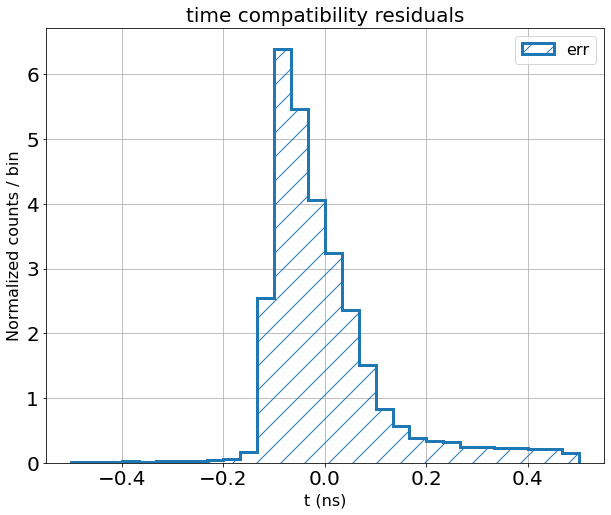

In [47]:
plt.figure(figsize=(10,8))
plt.hist(res,   bins=30, density=True, histtype="step", range=(-0.5,0.5), linewidth=3, label="err", hatch="/")
# # plt.hist(res5,  bins=30, density=True, range=(-6,6), histtype="step", linewidth=3, label="err*5")
# plt.hist(res10, bins=30, density=True, range=(-6,6), histtype="step", linewidth=3, label="err*2")
# # plt.hist(res15, bins=30, density=True, range=(-6,6), histtype="step", linewidth=3, label="err*3")
# plt.hist(res20, bins=30, density=True, range=(-6,6), histtype="step", linewidth=3, label="err*4")
# plt.axvline(3, c="r")
# plt.axvline(-3, c="r")
plt.grid()
plt.title("time compatibility residuals")
plt.xlabel("t (ns)")
plt.ylabel("Normalized counts / bin")
plt.legend()
plt.show()

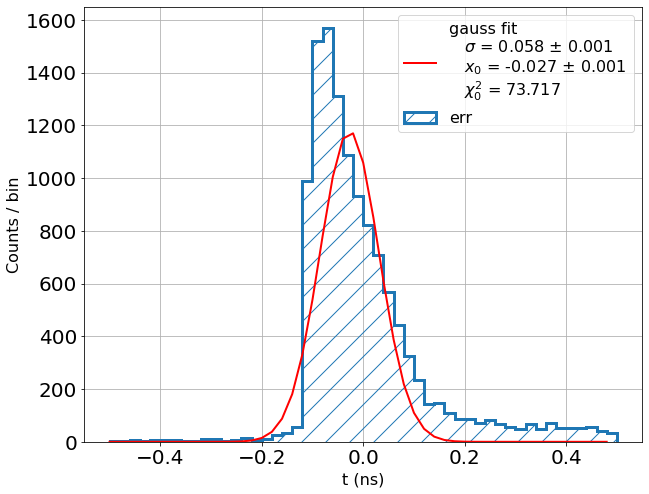

In [51]:
from isolation import *
bins=50
hist, nbins = np.histogram(res, bins=bins, range=(-0.5,0.5))
errors = [np.sqrt(oh+1) for oh in hist]
init_parameters = [1600,-0.1,1]
cost_func = cost.LeastSquares(nbins[:-1], hist, errors, model)
min_obj = Minuit(cost_func, *init_parameters)
result = min_obj.migrad()
chi2 = min_obj.fval/(len(nbins[:-1])-3)
result
plt.figure(figsize=(10,8))
plt.hist(res,   bins=bins, histtype="step", linewidth=3, label="err", hatch="/", range=(-0.5,0.5))
y = model(nbins[:-1], *result.values)
plt.plot(nbins[:-1], y, label=f'gauss fit\n   $\sigma$ = {result.values[2]:.3f} $\pm$ {result.errors[2]:.3f}\n   $x_0$ = {result.values[1]:.3f} $\pm$ {result.errors[1]:.3f} \n   $\chi^2_0$ = {chi2:.3f}', 
         color="red", linewidth=2)
plt.legend()
plt.xlabel("t (ns)")
plt.ylabel("Counts / bin")
# plt.title(f"dist(mtd,hgcal)/$\beta$c - ($t_{mtd} - t_{hgcal}$)")
plt.grid()

### Layer clusters time resolution vs energy

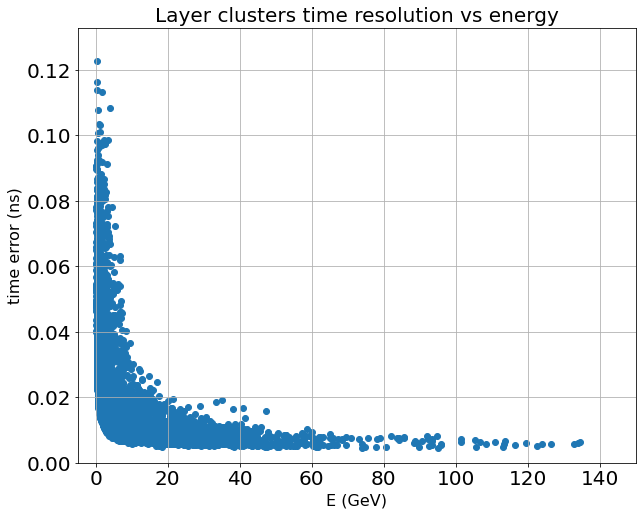

In [15]:
LCenergy = clusters["energy"].array()
LCtimeErr = clusters["cluster_timeErr"].array()
plt.figure(figsize=(10,8))
plt.scatter(ak.flatten(LCenergy)[:100000], ak.flatten(LCtimeErr)[:100000])
plt.ylim(0,max(ak.flatten(LCtimeErr)[:100000])+0.01)
plt.grid()
# plt.axvline(10, c="red")
plt.title("Layer clusters time resolution vs energy")
plt.xlabel("E (GeV)")
plt.ylabel("time error (ns)")
plt.xlim(-5,150)
plt.show()

In [35]:
trackstersMerged_CALO_time   = trackstersMerged["time"].array()
trackstersMerged_CALO_err    = trackstersMerged["timeError"].array()

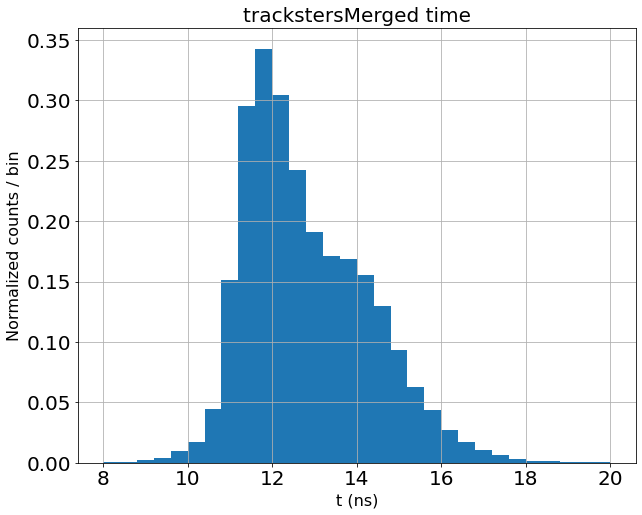

In [36]:
plt.figure(figsize=(10,8))
plt.hist(ak.flatten(trackstersMerged_CALO_time[trackstersMerged_CALO_time>-90]), bins=30, density=True, range=(8,20))
plt.grid()
plt.title("trackstersMerged time")
plt.xlabel("t (ns)")
plt.ylabel("Normalized counts / bin")
plt.show()

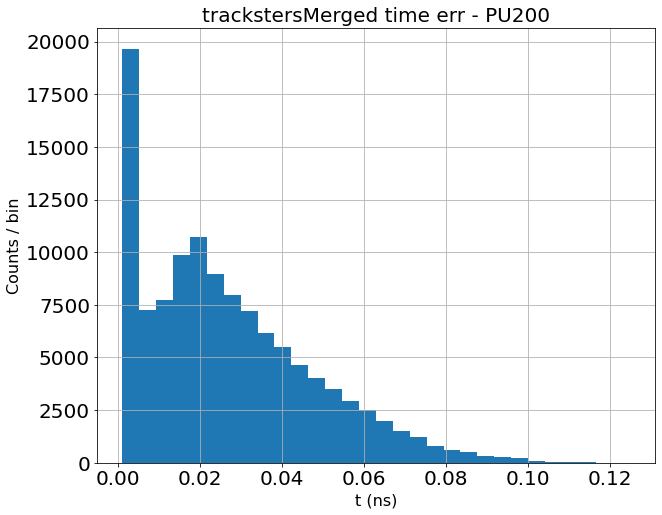

In [37]:
plt.figure(figsize=(10,8))
plt.hist(ak.flatten(trackstersMerged_CALO_err[trackstersMerged_CALO_time>-90]), bins=30)
plt.grid()
plt.title("trackstersMerged time err - PU200")
plt.xlabel("t (ns)")
plt.ylabel("Counts / bin")
plt.show()